<a href="https://colab.research.google.com/github/yantiputri/SEMESTER-3/blob/main/tugas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Praktikum_ml/tugas3'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df = pd.read_csv(path + "/data/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


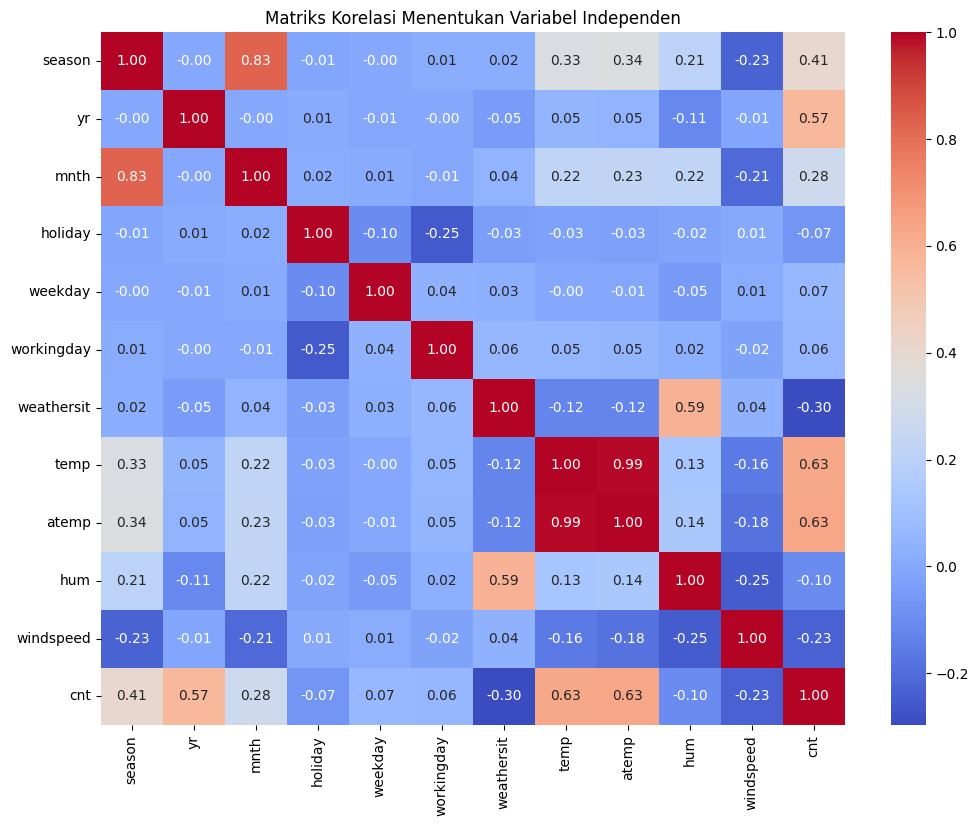

In [ ]:
df_cl = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])
corr_matrix = df_cl.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Menentukan Variabel Independen')
plt.show()

In [ ]:
x = df_cl[['atemp', 'yr', 'season']]
y = df_cl['cnt']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Jumlah data train :", len(X_train))
print("Jumlah data test :", len(X_test))

X_train.head()

Jumlah data train : 584
Jumlah data test : 147


,atemp,yr,season
682,0.323225,1,4
250,0.555361,0,3
336,0.310604,0,4
260,0.490537,0,3
543,0.640792,1,3


In [ ]:
X_train = sm.add_constant(X_train)
X_train.head()

,const,atemp,yr,season
682,1.0,0.323225,1,4
250,1.0,0.555361,0,3
336,1.0,0.310604,0,4
260,1.0,0.490537,0,3
543,1.0,0.640792,1,3


In [ ]:
model = sm.OLS(y_train, X_train).fit()
const = model.params['const']
coef_atemp = model.params['atemp']
coef_yr = model.params['yr']
coef_season = model.params['season']

print("Persamaan Regresi")
print(f"cnt = {const:.2f} + ({coef_atemp:.2f} * atemp + ({coef_yr:.2f} * yr) + {coef_season:.2f} * season)\n")

Persamaan Regresi
cnt = -522.07 + (6292.59 * atemp + (2068.68 * yr) + 400.81 * season)



In [ ]:
print("-- Hasil Regresi OLS --")
print(model.summary())


-- Hasil Regresi OLS --
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     508.0
Date:                Sat, 11 Oct 2025   Prob (F-statistic):          8.45e-162
Time:                        15:22:41   Log-Likelihood:                -4865.8
No. Observations:                 584   AIC:                             9740.
Df Residuals:                     580   BIC:                             9757.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -522.0670    147

In [ ]:
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

y_pred_test = model.predict(X_test_const)

hasil = pd.DataFrame({
    'cnt_aktual': y_test,
    'cnt_pred': y_pred_test
})
hasil['selisih eror'] = hasil['cnt_pred'] - hasil['cnt_aktual']
denom = hasil['cnt_aktual'].replace(0, np.nan)
hasil['akurasi(%)'] = (1 - (hasil['selisih eror'].abs() / denom)).clip(lower=0, upper=1) * 100

hasil.head()

,cnt_aktual,cnt_pred,selisih eror,akurasi(%)
703,6606,6101.416741,-504.583259,92.361743
33,1550,998.055136,-551.944864,64.390654
300,3747,3087.321994,-659.678006,82.394502
456,6041,4974.050196,-1066.949804,82.338192
633,7538,6574.147471,-963.852529,87.213418
